### **1. Consider the two dimensional data matrix [(2, 1), (3, 4), (5, 0), (7, 6), (9, 2)]. Implement principal component analysis. Use this to obtain the feature in transformed 2D feature space. Plot the scatter plot of data points in both the original as well as transformed domain.**

In [ ]:
import numpy as np
mat = np.array([(2, 1), (3, 4), (5, 0), (7, 6), (9, 2)])

In [ ]:
import numpy as np

def pca(data, n_components=2):
    mean = np.mean(data, axis=0)
    centered_data = data - mean
    covariance_matrix = np.cov(centered_data, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    components = sorted_eigenvectors[:, :n_components]
    transformed_data = np.dot(centered_data, components)
    return transformed_data, components

In [ ]:
transformed_data,compontents = pca(mat)
print(transformed_data)

[[-3.57770876e+00 -2.57076777e-16]
 [-1.34164079e+00  2.23606798e+00]
 [-1.34164079e+00 -2.23606798e+00]
 [ 3.13049517e+00  2.23606798e+00]
 [ 3.13049517e+00 -2.23606798e+00]]


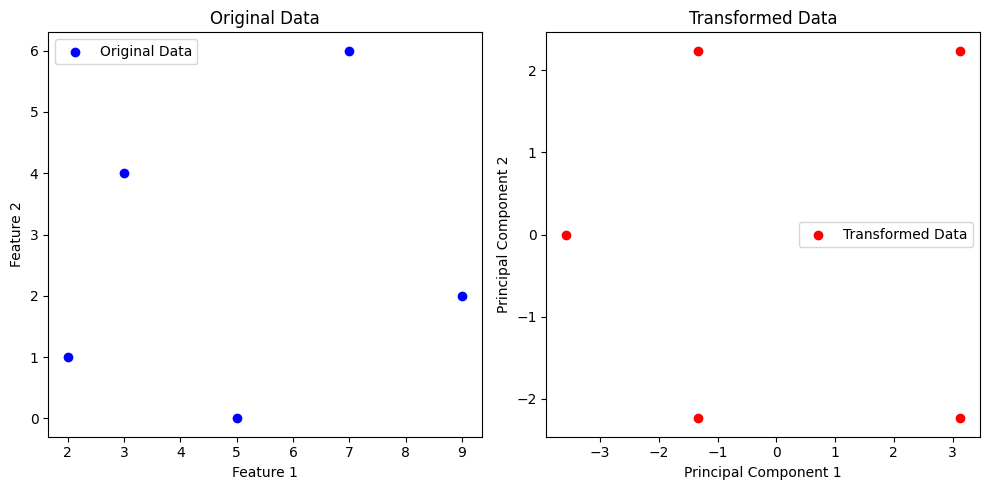

In [ ]:
import matplotlib.pyplot as plt

# Plot original data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(mat[:, 0], mat[:, 1], c='b', label='Original Data')
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Plot transformed data
plt.subplot(1, 2, 2)
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c='r', label='Transformed Data')
plt.title('Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.tight_layout()
plt.show()


### **2. Implement Principal Component Analysis Algorithm and use it to reduce dimensions of Iris Dataset (from 4D to 2D). Plot the scatter plot for samples in the transformed domain with different colour codes for samples belonging to different classes.**

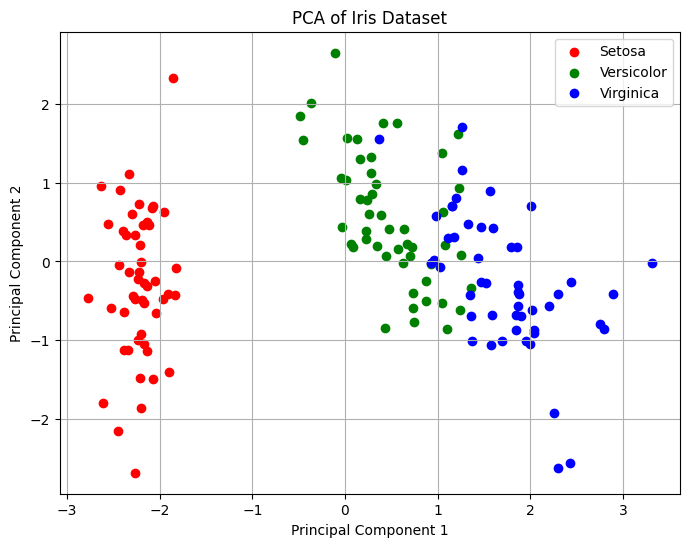

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_normalized = (X - X_mean) / X_std
cov_matrix = np.cov(X_normalized.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
transformed_data = np.dot(X_normalized, eigenvectors[:, :2])
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']
for target, color in zip(np.unique(y), colors):
    plt.scatter(transformed_data[y == target][:, 0], transformed_data[y == target][:, 1], color=color, label=target)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend(['Setosa', 'Versicolor', 'Virginica'])
plt.grid(True)
plt.show()
